In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the SMS spam dataset
file_path = 'C:/Users/DELL 7480/Downloads/spam.csv'
df = pd.read_csv(file_path, encoding='latin-1')  # Adjust encoding if necessary

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3862,spam,Oh my god! I've found your number again! I'm s...,NaN,NaN,NaN
3472,ham,You getting back any time soon?,NaN,NaN,NaN
2652,ham,No need for the drug anymore.,NaN,NaN,NaN
5265,ham,Gud ni8.swt drms.take care,NaN,NaN,NaN
254,ham,"I'm back, lemme know when you're ready",NaN,NaN,NaN


# Data cleaning

In [4]:
#Shape of the dataset
df.shape

(5572, 5)

In [5]:
#Checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#Checking null values proportion
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

Unnamed: 4    0.998923
Unnamed: 3    0.997846
Unnamed: 2    0.991027
v1            0.000000
v2            0.000000
dtype: float64

In [7]:
#Dropping the same
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
4346,spam,U 447801259231 have a secret admirer who is lo...
690,ham,Was the farm open?
4730,ham,K:)eng rocking in ashes:)
1653,ham,I was at bugis juz now wat... But now i'm walk...
3018,ham,Wat time do u wan 2 meet me later?


In [9]:
#Renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3419,spam,"As a valued customer, I am pleased to advise y..."
5409,ham,There is a first time for everything :)
911,ham,I am sorry it hurt you.
24,ham,Ffffffffff. Alright no way I can meet up with ...
4731,ham,Wat time r Ì_ going to xin's hostel?


In [10]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
#Check for duplicate values
df.duplicated().sum()

403

In [12]:
#Removing duplicates
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [13]:
df.shape

(5169, 2)

# EDA

In [14]:
df['target'].value_counts()

ham     4516
spam     653
Name: target, dtype: int64

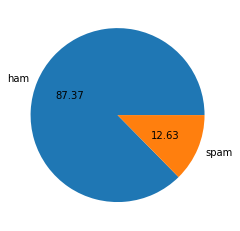

In [15]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

# 87%ham and 13%spam messages present in the dataset

# Data Preprocessing

In [16]:
# Data preprocessing
df['target'] = df['target'].map({'ham': 0, 'spam': 1})  # Convert labels to numerical values

In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

In [18]:
# Feature extraction using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

Naive Bayes is a good choice for many text classification tasks because of these reason I have choosen this model to evaluate the problem.

In [19]:
# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [20]:
# Make predictions on the test set
y_pred = classifier.predict(X_test_vectorized)

In [21]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [23]:
# Print the results
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


In [24]:
print('\nConfusion Matrix:\n', conf_matrix)


Confusion Matrix:
 [[887   2]
 [ 13 132]]


In [25]:
print('\nClassification Report:\n', classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       889
           1       0.99      0.91      0.95       145

    accuracy                           0.99      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034



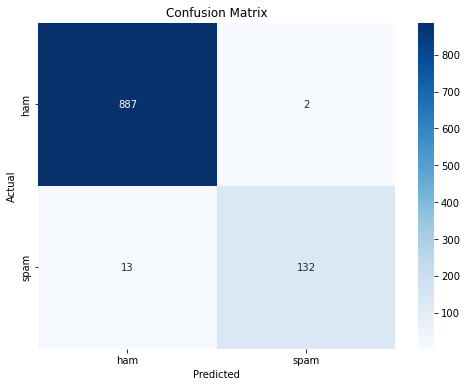

In [27]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()